## **1. Data Preprocessing and Data Cleaning**

In [287]:
''' Importing all the libraries necessary for data preprocessing and cleaning '''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [289]:
''' Read the dataset into a dataframe ''' 

df = pd.read_csv('bitcoin.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
'''The data is first imported from the dataset. 
We removed all the columns with missing values or the wrong timestamp. 
In addition to that, we also removed all the values before 2017 
because the plot before 2017 is significantly different from the plot after 2017.'''


df.Timestamp = pd.to_datetime(df.Timestamp, unit='s') # Convert the timestmp into datetime64 format
df.index = df.Timestamp # Set the index to datetime
df = df.resample('D').mean() # Resample the data to the average daily value of each column. This removes high frequencies
df = df.dropna() # Remove/Drop all the missing values 

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [291]:
print(df.shape) # Print the shape of the new data

(3376, 7)


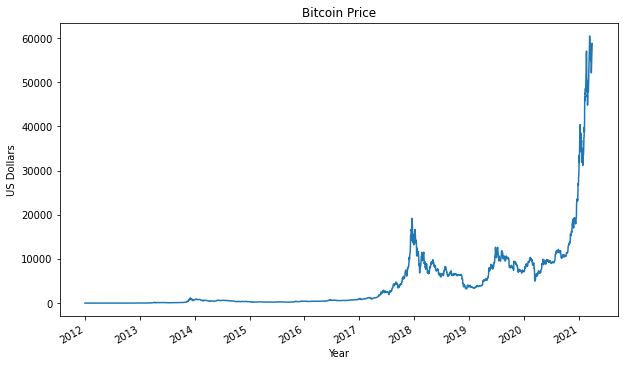

In [292]:
'''By plotting the graph we observe that the graph after 2017 is significantly
 different from the graph before 2017 so we remove all the values before it '''


df.Weighted_Price.plot(title = "Bitcoin Price", figsize=(10,6)) # Plot the price vs year graph
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.show()

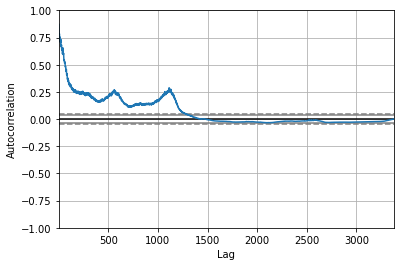

In [293]:
''' To check if there are a large number of gaps in the time series '''

autocorrelation_plot(df) # To draw an autocorrelation plot
plt.show()

In [294]:
''' Choosing only the data of the last 4 years and the other data doesn't follow the same pattern. 
This data looks much more relevant for training a model '''

df2 = df.loc['2017-03-01':'2021-03-01'] # Dropping all the values before 2017 March and all the values after 2021 March
df2 = df2.iloc[(-365*4):] # Checking if the same of the data is same as the other data
print(df2.shape) # Print the data 

(1460, 7)


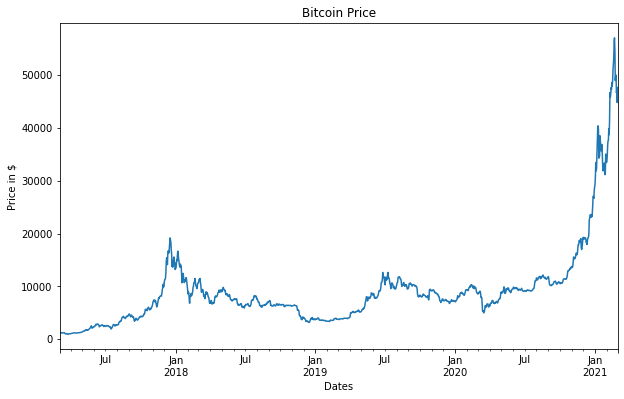

In [295]:
''' Plotting the graph again '''

df2.Weighted_Price.plot(title = "Bitcoin Price", figsize=(10,6)) 
plt.ylabel('Price in $')
plt.xlabel('Dates')
plt.show()

In [296]:
df2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-03-03,1272.931159,1273.464490,1272.368521,1272.955502,6.527229,8318.034966,1272.937727
2017-03-04,1267.666085,1268.148149,1267.194253,1267.721610,4.774573,6015.045229,1267.697008
2017-03-05,1258.482860,1259.020305,1258.053284,1258.495572,2.248156,2830.257382,1258.652090
2017-03-06,1274.775219,1275.101769,1274.483324,1274.813197,4.129881,5268.000907,1274.807021
2017-03-07,1252.030105,1252.635314,1251.352465,1252.011986,12.587141,15581.663422,1251.992528


## **4. RNN - LSTM IMPLEMENTATION**


In [297]:
''' Importing all the libraries '''

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split

In [298]:
df2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-03-03,1272.931159,1273.464490,1272.368521,1272.955502,6.527229,8318.034966,1272.937727
2017-03-04,1267.666085,1268.148149,1267.194253,1267.721610,4.774573,6015.045229,1267.697008
2017-03-05,1258.482860,1259.020305,1258.053284,1258.495572,2.248156,2830.257382,1258.652090
2017-03-06,1274.775219,1275.101769,1274.483324,1274.813197,4.129881,5268.000907,1274.807021
2017-03-07,1252.030105,1252.635314,1251.352465,1252.011986,12.587141,15581.663422,1251.992528


In [299]:
''' Train Test Split using the train_test_split method which takes the input, output values as well as test_size'''

X = df2.drop('Weighted_Price',axis=1)
y = df2['Weighted_Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)  # Train test split
y_train = np.array(y_train)  # Converting the training data into a numpy array
y_test = np.array(y_test) # Converting the training data into a numpy array
y_train = y_train.reshape(len(y_train), 1) # Reshaping our y train data to suitable shape
y_test = y_test.reshape(len(y_test), 1) # Reshaping our y test data to suitable shape


In [300]:
# Scaling our data for inputting into our model
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() 
scaler_y = MinMaxScaler()
x_train= scaler_x.fit_transform(X_train) 
x_test = scaler_x.transform(X_test) 
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)
x_train = np.reshape(x_train, (len(x_train), 1, 6)) 
x_test = np.reshape(x_test, (len(x_test), 1, 6)) 

In [302]:
'''
 Preparing the model
'''
model = Sequential()
model.add(LSTM(10,input_shape = (None,6), activation="relu", return_sequences=True))
model.add(Dense(1))

In [303]:
''' 
Compile the model
'''
model.compile(loss="mean_squared_error",optimizer="adam")

In [304]:
#fit the model to the training data
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.0342
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0700e-04
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.7368e-04
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1439e-04
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 9.8881e-05
Epoch 13/100
32/32 [=

In [305]:
# assign test and predicted values + reshaping + converting back from scaler
test_values = x_test
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)
y_test = scaler.inverse_transform(y_test)

In [306]:
print(predicted_price[100])
print(y_test[100])

[3288.5652]
[3291.99521681]


In [307]:
X_test

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2020-01-21,8645.480195,8649.571579,8642.046356,8645.604819,2.360702,20386.559122
2018-02-27,10552.619680,10560.028065,10545.099576,10552.921983,7.243201,76608.742377
2020-09-05,10268.434641,10276.175944,10259.914817,10268.025479,8.567235,87342.317616
2017-08-11,3504.350348,3506.692736,3501.226631,3504.276588,8.477167,29771.160096
2018-07-31,7915.237223,7918.563062,7911.173118,7914.978093,8.346615,65469.866943
...,...,...,...,...,...,...
2017-11-07,7103.250876,7108.395911,7097.076488,7102.876099,8.090588,57463.838377
2018-06-13,6443.258979,6448.252750,6436.521771,6443.017722,13.326739,85268.602875
2018-12-13,3360.830575,3362.474975,3359.062967,3360.825571,8.520014,28479.398644


In [309]:
X_test['predicted_price'] = predicted_price
X_test['actual_price'] = y_test
X_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),predicted_price,actual_price
Timestamp,,,,,,,,
2020-01-21,8645.480195,8649.571579,8642.046356,8645.604819,2.360702,20386.559122,3430.883057,3438.456907
2018-02-27,10552.619680,10560.028065,10545.099576,10552.921983,7.243201,76608.742377,4055.098877,4058.763613
2020-09-05,10268.434641,10276.175944,10259.914817,10268.025479,8.567235,87342.317616,3964.797607,3966.197318
2017-08-11,3504.350348,3506.692736,3501.226631,3504.276588,8.477167,29771.160096,1762.656372,1765.211271
2018-07-31,7915.237223,7918.563062,7911.173118,7914.978093,8.346615,65469.866943,3199.208984,3200.445730
...,...,...,...,...,...,...,...,...
2017-11-07,7103.250876,7108.395911,7097.076488,7102.876099,8.090588,57463.838377,2934.593262,2936.100408
2018-06-13,6443.258979,6448.252750,6436.521771,6443.017722,13.326739,85268.602875,2719.890381,2721.261414
2018-12-13,3360.830575,3362.474975,3359.062967,3360.825571,8.520014,28479.398644,1715.920532,1718.515443


In [196]:
'''
We find the root mean square error of our predicted values and consider this as the prediction metric
'''
rmse = np.sqrt(mean_squared_error(y_test, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 34.800
